In [0]:
import numpy as np
import matplotlib.pylab as plt

w0=np.random.uniform(-0.25,0.25)
w1=np.random.uniform(-1,1)
w2=np.random.uniform(-1,1)
w_main=[w0,w1,w2]
print('the picked numbers:', w_main)   

the picked numbers: [0.014066508997204796, 0.8806955395992693, -0.47386534100845457]


In [0]:
S=np.random.uniform(-1,1,size=(100,2))
S0=[]
S1=[]
for i in S:
  if (1*w0)+(i[0]*w1)+(i[1]*w2)>=0:
    S1.append([i[0]]+[i[1]]+[0])
  elif (i[0]*w1)+(i[1]*w2)<0:
    S0.append([i[0]]+[i[1]]+[1])

Vec=S0+S1        # 100 randomly picked vectors
print(Vec)

[[-0.7563839830354362, -0.6690906377570467, 1], [-0.48590336671597134, -0.17625169682362962, 1], [-0.5222595451406615, -0.33282768843426735, 1], [-0.44806364280407873, -0.4892639754373671, 1], [-0.14028178434618632, 0.3399054511752808, 1], [0.04825984850219611, 0.5771828543454451, 1], [0.3227315568892364, 0.6787926189788112, 1], [0.13870176055968764, 0.5762343421327654, 1], [-0.3026907651251054, -0.4635294456605805, 1], [-0.6512298610035958, -0.16682490833142172, 1], [-0.6214922635002262, 0.9109835183085306, 1], [-0.014635631621783496, 0.423228832421634, 1], [-0.9186822292658667, 0.6243166083833662, 1], [0.3062967170119373, 0.7662499652707182, 1], [-0.8435405419166688, -0.7751705547908279, 1], [-0.41815161259629763, 0.8274242289237492, 1], [-0.8479001096646301, -0.6254397750221159, 1], [-0.0907575714327844, 0.004354816879741152, 1], [-0.7790378799617943, 0.5499778606592411, 1], [-0.9308206779150672, 0.9319898235835511, 1], [-0.09440957080348245, 0.26831084416522955, 1], [-0.62185583035

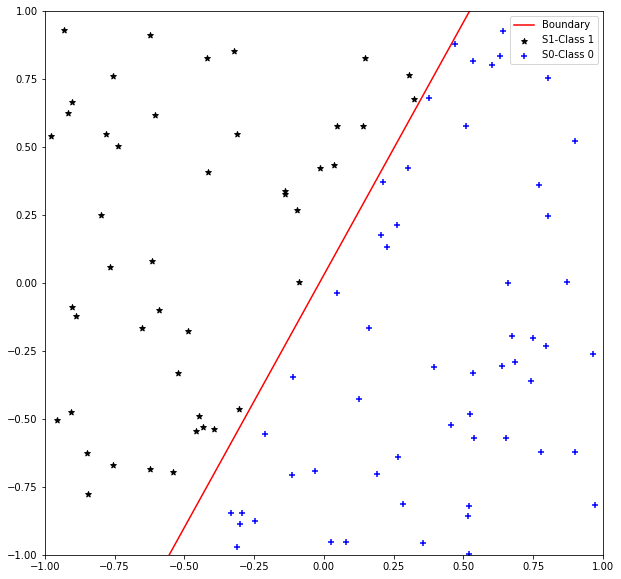

In [0]:
x1=-(w0-w2)/w1
x2=-(w0+w2)/w1
X=np.array([x1,x2])
Y=np.array([-1,+1])

S1_x=[]
S1_y=[]
S0_x=[]
S0_y=[]

for i in S0:
  S0_x.append(i[0])
  S0_y.append(i[1])
for i in S1:
  S1_x.append(i[0])
  S1_y.append(i[1])

fig,ax=plt.subplots(figsize=(10,10))
black=plt.scatter(S0_x,S0_y,c='black',marker='*',label='S1-Class 1')
blue=plt.scatter(S1_x,S1_y,c='blue',marker='+',label='S0-Class 0')
line=ax.plot(X,Y,c='red',label='Boundary')
plt.legend(loc="upper right")
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.show()

In [0]:
def act_function(x):
  if x>=0:
    y=1
  else:
    y=0
  return y


In [0]:
w0_1=np.random.uniform(-1,1)
w1_1=np.random.uniform(-1,1)
w2_1=np.random.uniform(-1,1)

w=[]
w=[w0_1,w1_1,w2_1]

def misclassifications(Vec,w):
  misclass=0
  for each in Vec:
    y=(w[0]+(each[0]*w[1])+each[1]*w[2])
    y=act_function(y)
    if y!=each[2]:
      misclass=misclass+1
  return misclass

a=misclassifications(Vec,w)
print('Number of misclassifications:',a)

Number of misclassifications: 75


In [0]:
def perceptron_training(eta):
  epoch=0;
  etas=[]
  missed=[]
  while (misclassifications(Vec,eta)!=0):
    missed.append(misclassifications(Vec,eta))
    print('Number of misclassifications:',missed[epoch])
    epoch=epoch+1
    print('Epoch Number:',epoch)
    for each in range(len(Vec)):
      y=eta[0]+(Vec[each][0]*eta[1])+(Vec[each][1]*eta[2])
      y=act_function(y)
      updated_input=[1]+Vec[each][0:2]
      final_output=Vec[each][2]
      difference=final_output-y
      if difference!=0:
        updated_input[0]=updated_input[0]*learning_rate*difference
        updated_input[1]=updated_input[1]*learning_rate*difference
        updated_input[2]=updated_input[2]*learning_rate*difference
        eta[0]=eta[0]+updated_input[0]
        eta[1]=eta[1]+updated_input[1]
        eta[2]=eta[2]+updated_input[2]
    print('Final weights:',eta)
    etas.append(eta)
  final_miscalssification=misclassifications(Vec,eta)
  print('Number of misclassifications:',final_miscalssification)
  print('final weights:',eta[-1])
  return etas,missed

Initial weight: [-0.16727667539993996, 0.39522763624171486, -0.21349363513846797]
Number of misclassifications: 75
Epoch Number: 1
Final weights: [-1.16727667539994, -0.03861788922931919, 0.01957625821940656]
Number of misclassifications: 45
Epoch Number: 2
Final weights: [-2.1672766753999397, -1.0481590167977552, 0.19335413297537518]
Number of misclassifications: 45
Epoch Number: 3
Final weights: [-1.1672766753999397, -2.321111365634712, 0.4519735208800275]
Number of misclassifications: 23
Epoch Number: 4
Final weights: [-1.1672766753999397, -3.1829046187500394, 0.3833174581719321]
Number of misclassifications: 13
Epoch Number: 5
Final weights: [-1.1672766753999397, -3.4246045811085413, 0.9324283080961131]
Number of misclassifications: 16
Epoch Number: 6
Final weights: [-0.16727667539993973, -3.712904881118974, 1.3676568455579647]
Number of misclassifications: 2
Epoch Number: 7
Final weights: [-1.1672766753999397, -3.594283473929397, 2.0766185300146933]
Number of misclassifications: 1

<function matplotlib.pyplot.show>

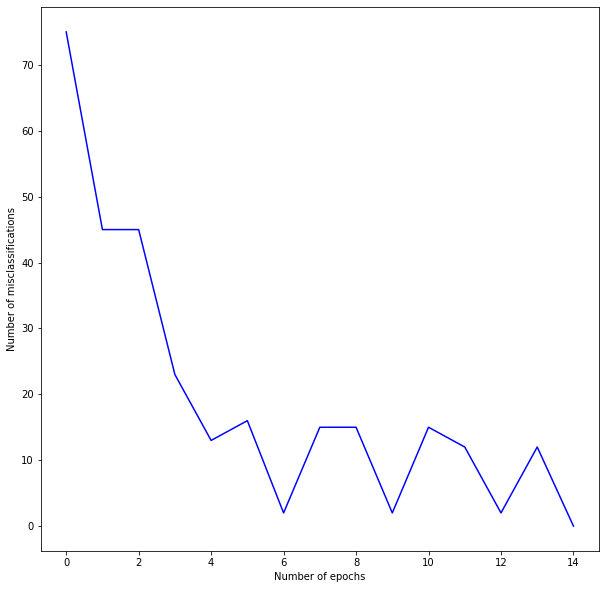

In [0]:
learning_rate=1
print('Initial weight:', w)
etas=[]
etas,missed=perceptron_training(w)
n_epochs=range(len(etas)+1)
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(n_epochs,missed+[0], c='blue')
plt.ylabel('Number of misclassifications')
plt.xlabel('Number of epochs')
plt.show

Initial weight: [-0.16727667539993996, 0.39522763624171486, -0.21349363513846797]
Number of misclassifications: 75
Epoch Number: 1
Final weights: [-20.16727667539994, -11.670101553920356, -2.053694532356838]
Number of misclassifications: 45
Epoch Number: 2
Final weights: [-10.16727667539994, -16.928776167070602, 9.447887456429168]
Number of misclassifications: 25
Epoch Number: 3
Final weights: [-10.16727667539994, -25.506797777548115, 4.849035066347701]
Number of misclassifications: 16
Epoch Number: 4
Final weights: [-10.16727667539994, -26.279451144922923, 14.749829166577694]
Number of misclassifications: 20
Epoch Number: 5
Final weights: [-10.16727667539994, -34.85747275540044, 10.150976776496227]
Number of misclassifications: 14
Epoch Number: 6
Final weights: [-10.16727667539994, -36.279157689170425, 17.717497415811778]
Number of misclassifications: 15
Epoch Number: 7
Final weights: [-10.16727667539994, -41.77397589733437, 14.916911648927108]
Number of misclassifications: 11
Epoch N

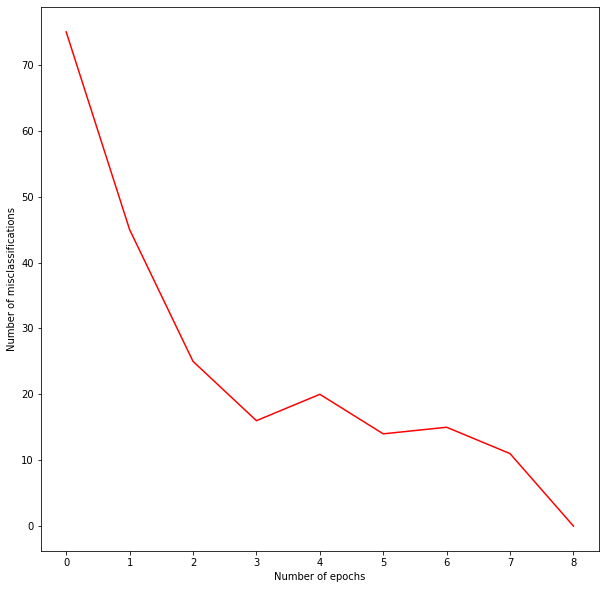

In [0]:
eta=[w0_1,w1_1,w2_1]
learning_rate=10
print('Initial weight:',eta)
etas=[]
etas,missed=perceptron_training(eta)
n_epochs=range(len(etas)+1)
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(n_epochs,missed+[0],c='red')
plt.xlabel('Number of epochs')
plt.ylabel('Number of misclassifications')
plt.show()

Initial weight: [-0.16727667539993996, 0.39522763624171486, -0.21349363513846797]
Number of misclassifications: 75
Epoch Number: 1
Final weights: [-0.16727667539993998, 0.0627836212165355, -0.0966574042155145]
Number of misclassifications: 45
Epoch Number: 2
Final weights: [-0.16727667539993998, -0.10563803139729666, -0.031281320756056503]
Number of misclassifications: 45
Epoch Number: 3
Final weights: [-0.16727667539993998, -0.21179010044809923, 0.002044811253435086]
Number of misclassifications: 34
Epoch Number: 4
Final weights: [-0.16727667539993998, -0.29049499866019785, 0.045531919726263276]
Number of misclassifications: 25
Epoch Number: 5
Final weights: [-0.06727667539993998, -0.36325533156764517, 0.08281783503631843]
Number of misclassifications: 9
Epoch Number: 6
Final weights: [-0.06727667539993998, -0.3472789972882806, 0.1752670863262403]
Number of misclassifications: 10
Epoch Number: 7
Final weights: [-0.06727667539993998, -0.3685711645186571, 0.16145666034575296]
Number of 

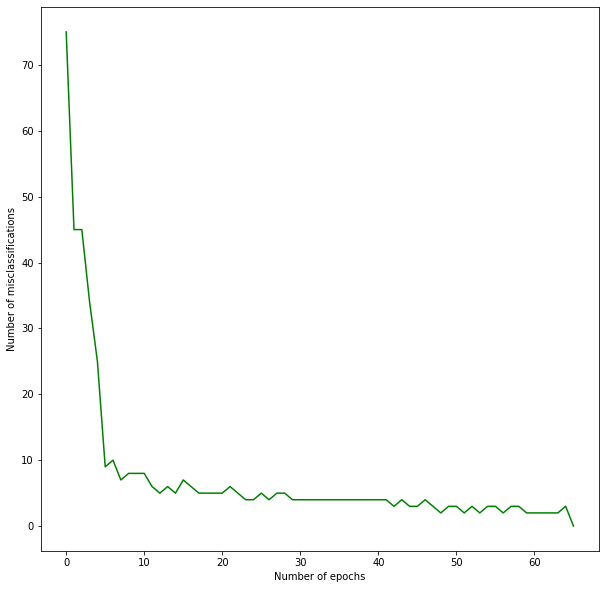

In [0]:
eta=[w0_1,w1_1,w2_1]
learning_rate=0.1
print('Initial weight:',eta)
etas=[]
etas,missed=perceptron_training(eta)
n_epochs=range(len(etas)+1)
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(n_epochs,missed+[0],c='green')
plt.xlabel('Number of epochs')
plt.ylabel('Number of misclassifications')
plt.show()

3(j): N=1000

In [0]:
import numpy as np
import matplotlib.pylab as plt

w0=np.random.uniform(-0.25,0.25)
w1=np.random.uniform(-1,1)
w2=np.random.uniform(-1,1)
w_main=[w0,w1,w2]
print('the picked numbers:', w_main)   

the picked numbers: [-0.10183912884444396, -0.4657240864480303, -0.2352180741849188]


In [0]:
S=np.random.uniform(-1,1,size=(1000,2))
S0=[]
S1=[]
for i in S:
  if (1*w0)+(i[0]*w1)+(i[1]*w2)>=0:
    S1.append([i[0]]+[i[1]]+[0])
  elif (i[0]*w1)+(i[1]*w2)<0:
    S0.append([i[0]]+[i[1]]+[1])

Vec=S0+S1        # 1000 randomly picked vectors
print(Vec)

[[0.43712164369517525, -0.40470676846513576, 1], [-0.3518582156214751, 0.76002692788081, 1], [0.7859517747412545, -0.06361587159470239, 1], [0.6633705235174219, -0.11713760821934627, 1], [0.2413495277262101, -0.38257316494208116, 1], [0.4043298500553143, 0.7378960871849674, 1], [-0.20741074029195672, 0.49416497543640703, 1], [0.9144885976499733, -0.6193002949691375, 1], [0.772174115846965, -0.5137596342476383, 1], [0.7164596767862379, 0.052311405993750615, 1], [0.4285178407622341, -0.14275193279526066, 1], [0.7932284004200296, -0.7931532568073745, 1], [0.8828529472036222, 0.23960541864589935, 1], [0.8781829717737508, -0.7302390219738861, 1], [0.7328059780933236, -0.09221890781444131, 1], [0.8214058405088518, -0.045436707917213326, 1], [0.9121485750754368, 0.6942268742006559, 1], [0.30962668116101266, 0.41288250049195807, 1], [0.44676043945620614, 0.8849359287432641, 1], [-0.23011384784277644, 0.7358615782924784, 1], [0.7495660039260856, -0.21996038403682383, 1], [0.18557091345755006, -

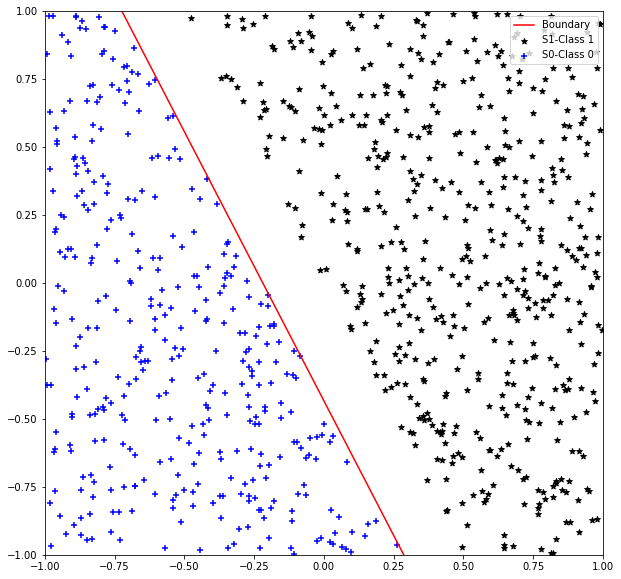

In [0]:
x1=-(w0-w2)/w1
x2=-(w0+w2)/w1
X=np.array([x1,x2])
Y=np.array([-1,+1])

S1_x=[]
S1_y=[]
S0_x=[]
S0_y=[]

for i in S0:
  S0_x.append(i[0])
  S0_y.append(i[1])
for i in S1:
  S1_x.append(i[0])
  S1_y.append(i[1])

fig,ax=plt.subplots(figsize=(10,10))
black=plt.scatter(S0_x,S0_y,c='black',marker='*',label='S1-Class 1')
blue=plt.scatter(S1_x,S1_y,c='blue',marker='+',label='S0-Class 0')
line=ax.plot(X,Y,c='red',label='Boundary')
plt.legend(loc="upper right")
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.show()

In [0]:
def act_function(x):
  if x>=0:
    y=1
  else:
    y=0
  return y

In [0]:
w0_1=np.random.uniform(-1,1)
w1_1=np.random.uniform(-1,1)
w2_1=np.random.uniform(-1,1)

w=[]
w=[w0_1,w1_1,w2_1]

def misclassifications(Vec,w):
  misclass=0
  for each in Vec:
    y=(w[0]+(each[0]*w[1])+each[1]*w[2])
    y=act_function(y)
    if y!=each[2]:
      misclass=misclass+1
  return misclass

a=misclassifications(Vec,w)
print('Number of misclassifications:',a)

Number of misclassifications: 184


In [0]:
def perceptron_training(eta):
  epoch=0;
  etas=[]
  missed=[]
  while (misclassifications(Vec,eta)!=0):
    missed.append(misclassifications(Vec,eta))
    print('Number of misclassifications:',missed[epoch])
    epoch=epoch+1
    print('Epoch Number:',epoch)
    for each in range(len(Vec)):
      y=eta[0]+(Vec[each][0]*eta[1])+(Vec[each][1]*eta[2])
      y=act_function(y)
      updated_input=[1]+Vec[each][0:2]
      final_output=Vec[each][2]
      difference=final_output-y
      if difference!=0:
        updated_input[0]=updated_input[0]*learning_rate*difference
        updated_input[1]=updated_input[1]*learning_rate*difference
        updated_input[2]=updated_input[2]*learning_rate*difference
        eta[0]=eta[0]+updated_input[0]
        eta[1]=eta[1]+updated_input[1]
        eta[2]=eta[2]+updated_input[2]
    print('Final weights:',eta)
    etas.append(eta)
  final_miscalssification=misclassifications(Vec,eta)
  print('Number of misclassifications:',final_miscalssification)
  print('final weights:',eta[-1])
  return etas,missed

Initial weight: [0.2684445617017597, 0.7505052466769433, -0.31312549934943124]
Number of misclassifications: 184
Epoch Number: 1
Final weights: [-0.7315554382982403, 1.4099012031215008, 0.9596287193635988]
Number of misclassifications: 255
Epoch Number: 2
Final weights: [0.2684445617017597, 2.2641452268354634, 1.0673761013823693]
Number of misclassifications: 0
final weights: 1.0673761013823693


<function matplotlib.pyplot.show>

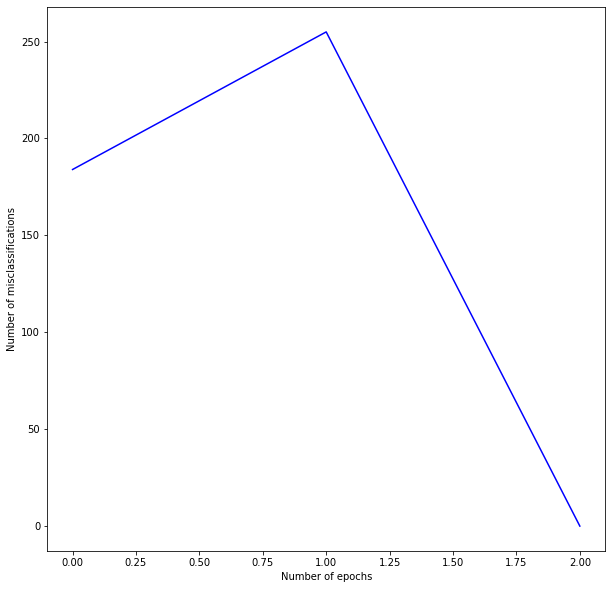

In [0]:
learning_rate=1
print('Initial weight:', w)
etas=[]
etas,missed=perceptron_training(w)
n_epochs=range(len(etas)+1)
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(n_epochs,missed+[0], c='blue')
plt.ylabel('Number of misclassifications')
plt.xlabel('Number of epochs')
plt.show

Initial weight: [0.2684445617017597, 0.7505052466769433, -0.31312549934943124]
Number of misclassifications: 184
Epoch Number: 1
Final weights: [0.26844456170175945, 6.152096230179318, 2.663162848422152]
Number of misclassifications: 1
Epoch Number: 2
Final weights: [0.26844456170175945, 16.652280124311964, 8.626117126098631]
Number of misclassifications: 0
final weights: 8.626117126098631


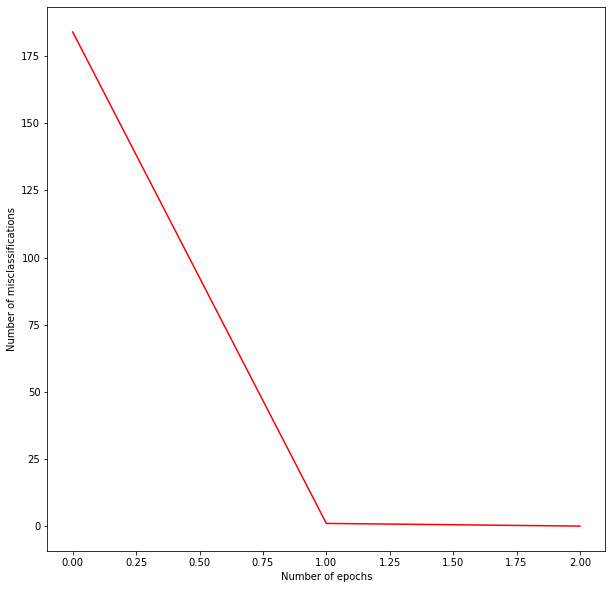

In [0]:
eta=[w0_1,w1_1,w2_1]
learning_rate=10
print('Initial weight:',eta)
etas=[]
etas,missed=perceptron_training(eta)
n_epochs=range(len(etas)+1)
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(n_epochs,missed+[0],c='red')
plt.xlabel('Number of epochs')
plt.ylabel('Number of misclassifications')
plt.show()

Initial weight: [0.2684445617017597, 0.7505052466769433, -0.31312549934943124]
Number of misclassifications: 184
Epoch Number: 1
Final weights: [-0.13155543829824035, 0.7483941081125636, 0.20444922852107783]
Number of misclassifications: 80
Epoch Number: 2
Final weights: [0.06844456170175967, 0.6924672125212203, 0.32986841885279955]
Number of misclassifications: 0
final weights: 0.32986841885279955


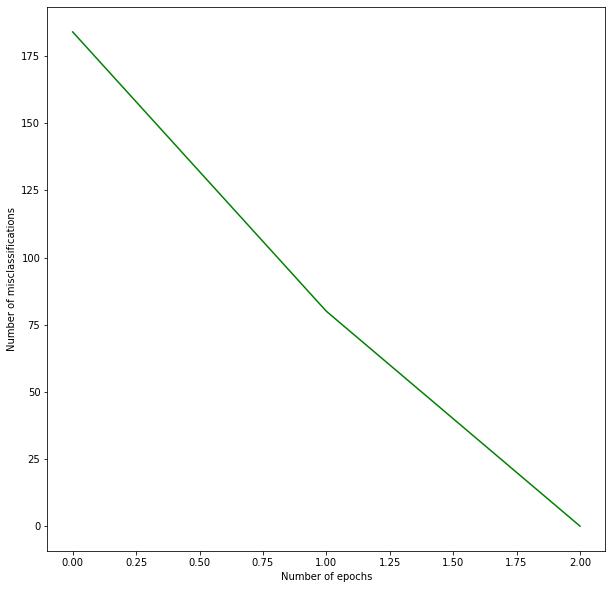

In [0]:
eta=[w0_1,w1_1,w2_1]
learning_rate=0.1
print('Initial weight:',eta)
etas=[]
etas,missed=perceptron_training(eta)
n_epochs=range(len(etas)+1)
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(n_epochs,missed+[0],c='green')
plt.xlabel('Number of epochs')
plt.ylabel('Number of misclassifications')
plt.show()